# ___Gaussian Mixture Models (GMM) Clustering - Expectation-Maximization (EM)___
---

## ___Expectation-Maximization (EM)___

_A common modeling problem involves how to estimate a joint probability distribution for a dataset._

_Density estimation involves selecting a probability distribution function and the parameters of that distribution that best explain the joint probability distribution of the observed data._

___Maximum likelihood estimation (MLE)___ _is an approach to density estimation for a dataset by searching across probability distributions and their parameters._

_A limitation of maximum likelihood estimation is that it assumes that the dataset is complete, or fully observed. This does not mean that the model has access to all data; instead, it assumes that all variables that are relevant to the problem are present. Maximum likelihood becomes intractable if there are variables that interact with those in the dataset but were hidden or not observed, so-called __latent variables__._

_The __Expectation-Maximization__ algorithm is an approach for performing maximum likelihood estimation in the presence of latent variables. It does this by first estimating the values for the latent variables, then optimizing the model, then repeating these two steps until convergence. It is an effective and general approach and is most commonly used for density estimation with missing data, such as clustering algorithms like the __Gaussian Mixture Model__._

_The EM algorithm is an iterative approach that cycles between two modes. The first mode attempts to estimate the missing or latent variables, called the estimation-step or __E-step__. The second mode attempts to optimize the parameters of the model to best explain the data, called the maximization-step or __M-step__._

* ___E-Step___ _: Estimate the missing variables in the dataset._
* ___M-Step___ _: Maximize the parameters of the model in the presence of the data._

_The EM algorithm can be applied quite widely, although is perhaps most well known in machine learning for use in unsupervised learning problems, such as density estimation and clustering._

_The essence of __Expectation-Maximization algorithm__ is to use the available observed data of the dataset to estimate the missing data and then using that data to update the values of the parameters. Let us understand the EM algorithm in detail._

* _Initially, a set of initial values of the parameters are considered. A set of incomplete observed data is given to the system with the assumption that the observed data comes from a specific model._

* _The next step is known as “Expectation” – step or E-step. In this step, we use the observed data in order to estimate or guess the values of the missing or incomplete data. It is basically used to update the variables._

* _The next step is known as “Maximization”-step or M-step. In this step, we use the complete data generated in the preceding “Expectation” – step in order to update the values of the parameters. It is basically used to update the hypothesis._

* _Now, in the fourth step, it is checked whether the values are converging or not, if yes, then stop otherwise repeat step-2 and step-3 i.e. “Expectation” – step and “Maximization” – step until the convergence occurs._

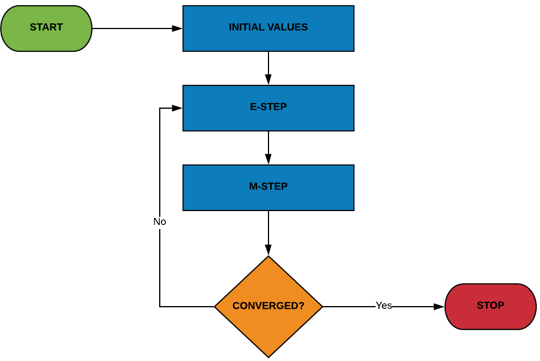

### ___Usage of EM Algorithm___
* _It can be used to fill the missing data in a sample._
* _It can be used as the basis of unsupervised learning of clusters._
* _It can be used for the purpose of estimating the parameters of Hidden Markov Model (HMM)._
* _It can be used for discovering the values of latent variables._

### ___Advantages of EM Algorithm___
* _It is always guaranteed that likelihood will increase with each iteration._
* _The E-step and M-step are often pretty easy for many problems in terms of implementation._
* _Solutions to the M-steps often exist in the closed form._

### ___Disadvantages of EM algorithm___
* _It has slow convergence._
* _It makes convergence to the local optima only._
* _It requires both the probabilities, forward and backward (numerical optimization requires only forward probability)._

## ___Gaussian Curve___

_Gaussian Distributions (or the Normal Distribution) is a bell-shaped curve, with the data points symmetrically distributed around the mean value._

_The below image has a few Gaussian distributions with a difference in mean (μ) and variance (σ2). Remember that the higher the σ value more would be the spread:_

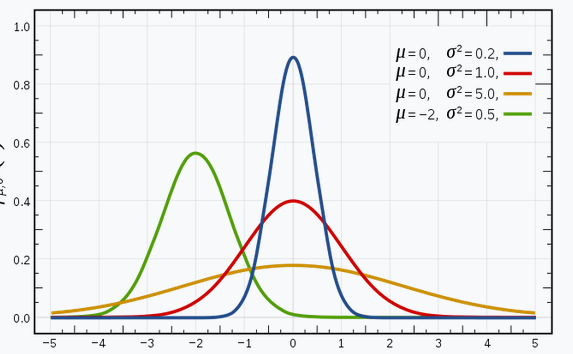

_In a one dimensional space, the probability density function of a Gaussian distribution is given by:_

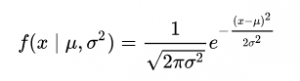

_where μ is the mean and σ2 is the variance._

_But this would only be true for a single variable. In the case of two variables, instead of a 2D bell-shaped curve, we will have a 3D bell curve as shown below:_

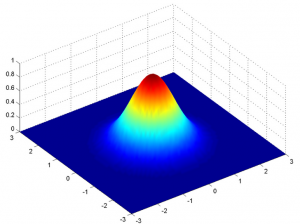

_The probability density function would be given by:_

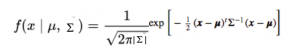

_where x is the input vector, μ is the 2D mean vector, and Σ is the 2×2 covariance matrix. The covariance would now define the shape of this curve. We can generalize the same for d-dimensions._

_Thus, this multivariate Gaussian model would have x and μ as vectors of length d, and Σ would be a d x d covariance matrix._

## ___Gaussian Mixture Model___

_A mixture model is a model comprised of an unspecified combination of multiple probability distribution functions._

_A statistical procedure or learning algorithm is used to estimate the parameters of the probability distributions to best fit the density of a given training dataset._

_The Gaussian Mixture Model, or GMM for short, is a mixture model that uses a combination of Gaussian (Normal) probability distributions and requires the estimation of the mean and standard deviation parameters for each._

_Gaussian Mixture Models are probabilistic models and use the soft clustering approach for distributing the points in different clusters._

_There are many techniques for estimating the parameters for a GMM, although a maximum likelihood estimate is perhaps the most common._

_Consider the case where a dataset is comprised of many points that happen to be generated by two different processes. The points for each process have a Gaussian probability distribution, but the data is combined and the distributions are similar enough that it is not obvious to which distribution a given point may belong._

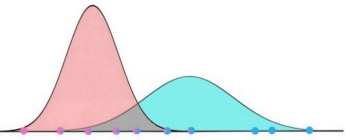

_The processes used to generate the data point represents a latent variable, e.g. process 0 and process 1. It influences the data but is not observable. As such, the EM algorithm is an appropriate approach to use to estimate the parameters of the distributions._

_In the EM algorithm, the estimation-step would estimate a value for the process latent variable for each data point, and the maximization step would optimize the parameters of the probability distributions in an attempt to best capture the density of the data. The process is repeated until a good set of latent values and a maximum likelihood is achieved that fits the data._

* ___E-Step___ _- Estimate the expected value for each latent variable._
* ___M-Step___ _- Optimize the parameters of the distribution using maximum likelihood._

In [1]:
import numpy as np
from numpy.random import normal
from numpy import hstack
import matplotlib.pyplot as plt

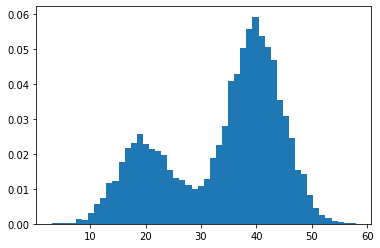

In [2]:
# example of a bimodal constructed from two gaussian processes
# generate a sample
X1 = normal(loc=20, scale=5, size=3000)
X2 = normal(loc=40, scale=5, size=7000)
X = hstack((X1, X2))
# plot the histogram
plt.hist(X, bins=50, density=True)
plt.show()

_The plot clearly shows the expected bimodal distribution with a peak for the first process around 20 and a peak for the second process around 40._

_We can see that for many of the points in the middle of the two peaks that it is ambiguous as to which distribution they were drawn from._

_The GaussianMixture scikit-learn class can be used to model this problem and estimate the parameters of the distributions using the expectation-maximization algorithm._

_The class allows us to specify the suspected number of underlying processes used to generate the data via the n_components argument when defining the model. We will set this to 2 for the two processes or distributions._

_If the number of processes was not known, a range of different numbers of components could be tested and the model with the best fit could be chosen, where models could be evaluated using scores such as Akaike or Bayesian Information Criterion (AIC or BIC)._

_There are also many ways we can configure the model to incorporate other information we may know about the data, such as how to estimate initial values for the distributions. In this case, we will randomly guess the initial parameters, by setting the init_params argument to ‘random’._

In [3]:
from sklearn.mixture import GaussianMixture

# reshape into a table with one column
X = X.reshape((len(X), 1))

model = GaussianMixture(n_components=2, init_params='random')
model.fit(X)

# predict latent values
yhat = model.predict(X)
# check latent value for first few points
print(yhat[:100])
# check latent value for last few points
print(yhat[-100:])

[0 0 0 1 0 1 0 0 1 0 0 1 0 1 1 0 1 0 0 1 0 0 1 0 0 1 0 0 0 0 0 1 1 1 1 0 0
 0 0 1 1 1 1 0 0 1 1 0 0 1 1 1 1 0 0 0 0 0 0 1 1 0 0 0 0 1 1 1 0 0 1 1 0 0
 1 1 0 0 0 1 1 1 0 0 1 0 1 1 0 1 1 0 0 1 0 0 0 1 0 1]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


## ___Expectation-Maximization in Gaussian Mixture Models___

_Let’s say we need to assign k number of clusters. This means that there are k Gaussian distributions, with the mean and covariance values to be μ1, μ2, .. μk and Σ1, Σ2, .. Σk . Additionally, there is another parameter for the distribution that defines the number of points for the distribution. Or in other words, the density of the distribution is represented with Πi._

_Now, we need to find the values for these parameters to define the Gaussian distributions. We already decided the number of clusters, and randomly assigned the values for the mean, covariance, and density. Next, we’ll perform the E-step and the M-step!_

___E-step___

_For each point xi, calculate the probability that it belongs to cluster/distribution c1, c2, … ck. This is done using the below formula:_

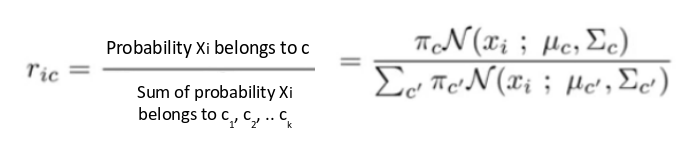

_This value will be high when the point is assigned to the right cluster and lower otherwise._

___M-step___

_Post the E-step, we go back and update the Π, μ and Σ values. These are updated in the following manner:_

_The new density is defined by the ratio of the number of points in the cluster and the total number of points:_

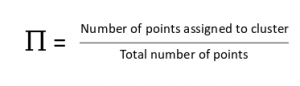

_The mean and the covariance matrix are updated based on the values assigned to the distribution, in proportion with the probability values for the data point. Hence, a data point that has a higher probability of being a part of that distribution will contribute a larger portion:_

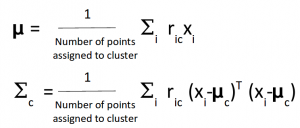

_Based on the updated values generated from this step, we calculate the new probabilities for each data point and update the values iteratively. This process is repeated in order to maximize the log-likelihood function._

```
k-means only considers the mean to update the centroid while GMM takes into account the mean as well as the variance of the data!
```

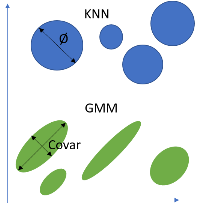

_[Link](https://www.geeksforgeeks.org/gaussian-mixture-model/)_ _[Video Link 1](https://www.youtube.com/watch?v=DIADjJXrgps)_
_[Video Link 2](https://www.youtube.com/watch?v=JNlEIEwe-Cg)_

## ___Clustering using k-Means & GMM___

In [4]:
import pandas as pd

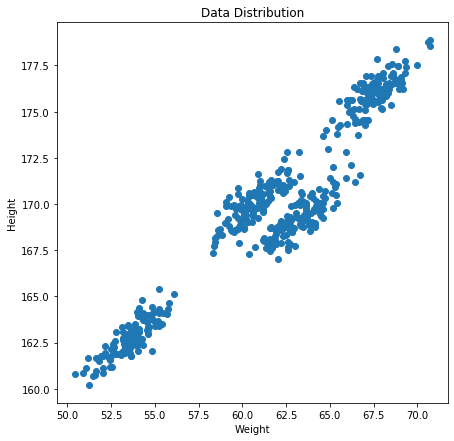

In [5]:
data = pd.read_csv(r'C:\Users\PiyushSin\Desktop\datasets\Clustering_gmm.csv')

plt.figure(figsize=(7,7))
plt.scatter(data["Weight"],data["Height"])
plt.xlabel('Weight')
plt.ylabel('Height')
plt.title('Data Distribution')
plt.show()

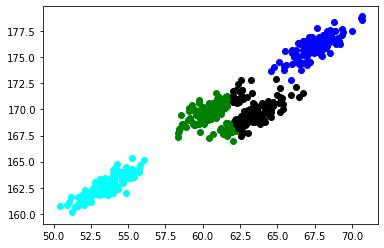

In [6]:
#training k-means model

from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4)
kmeans.fit(data)

#predictions from kmeans
pred = kmeans.predict(data)
frame = pd.DataFrame(data)
frame['cluster'] = pred
frame.columns = ['Weight', 'Height', 'cluster']

#plotting results
color=['blue','green','cyan', 'black']
for k in range(0,4):
    data = frame[frame["cluster"]==k]
    plt.scatter(data["Weight"],data["Height"],c=color[k])
plt.show()

_The k-means model failed to identify the right clusters. Look closely at the clusters in the center – k-means has tried to build a circular cluster even though the data distribution is elliptical._

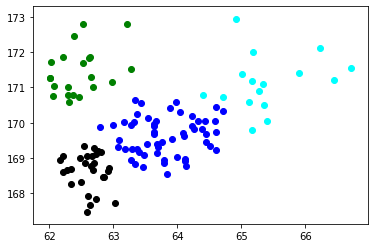

In [7]:
# training gaussian mixture model 

from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=4)
gmm.fit(data)

#predictions from gmm
labels = gmm.predict(data)
frame = pd.DataFrame(data)
frame['cluster'] = labels
frame.columns = ['Weight', 'Height', 'cluster']

color=['blue','green','cyan', 'black']
for k in range(0,4):
    data = frame[frame["cluster"]==k]
    plt.scatter(data["Weight"],data["Height"],c=color[k])
plt.show()

## ___IRIS Dataset___

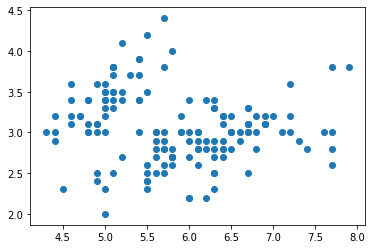

In [8]:
from pandas import DataFrame 
from sklearn import datasets 
from sklearn.mixture import GaussianMixture 
  
# load the iris dataset 
iris = datasets.load_iris() 
  
# select first two columns  
X = iris.data[:, :2] 
  
# turn it into a dataframe 
d = pd.DataFrame(X) 
  
# plot the data 
plt.scatter(d[0], d[1]) 

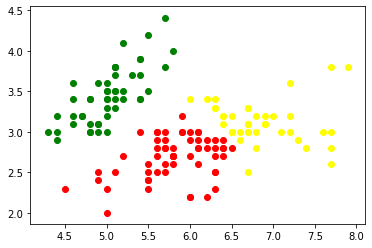

In [9]:
gmm = GaussianMixture(n_components = 3) 
  
# Fit the GMM model for the dataset  
# which expresses the dataset as a  
# mixture of 3 Gaussian Distribution 
gmm.fit(d) 
  
# Assign a label to each sample 
labels = gmm.predict(d) 
d['labels']= labels 
d0 = d[d['labels']== 0] 
d1 = d[d['labels']== 1] 
d2 = d[d['labels']== 2] 
  
# plot three clusters in same plot 
plt.scatter(d0[0], d0[1], c ='r') 
plt.scatter(d1[0], d1[1], c ='yellow') 
plt.scatter(d2[0], d2[1], c ='g')

In [10]:
# print the converged log-likelihood value 
print(gmm.lower_bound_) 

-1.4987505566235169


In [11]:
# print the number of iterations needed 
# for the log-likelihood value to converge 
print(gmm.n_iter_)

8


In [12]:
gmm.covariances_

array([[[0.27671149, 0.08897036],
        [0.08897036, 0.09389206]],

       [[0.36153508, 0.05159664],
        [0.05159664, 0.08927917]],

       [[0.11944714, 0.08835648],
        [0.08835648, 0.11893388]]])

In [13]:
gmm.means_

array([[5.9009976 , 2.74387546],
       [6.68055626, 3.02849627],
       [5.01507898, 3.4514463 ]])

In [14]:
gmm.weights_

array([0.38081285, 0.29474143, 0.32444572])